<a href="https://colab.research.google.com/github/kefournier/apcsa/blob/master/MyAPCSNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook to create some data visualizations of our sample data set

In this notebook, we'll learn a little Python, take advantage of some Python libraries to create basic data visualizations, and add Google Colab notebooks to our arsenal of tools we have become comfortable with this school year :)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving APCS.csv to APCS.csv


In [46]:
#importing libraries we'll be using
import pandas as pd
import matplotlib.pyplot as plot
import io

#creating variable (df is short for data frame) to hold the contents 
#of our .csv file

df = pd.read_csv(io.StringIO(uploaded['APCS.csv'].decode('utf-8')), sep = ',')

#To check and make sure my .csv file uploaded, I can use the head() 
#function to see the first few lines of my file
df.head()

,name,age,height,hair color,eye color
0,Mark,44,70,brown,hazel
1,John,45,70,brown,hazel
2,Sara,46,70,brown,hazel
3,Megan,57,67,brown,hazel
4,Jeanine,48,67,brown,hazel


### Data visualizations

Here we'll take advantage of the matplotlib and create some basic visualiztions representing the data we have in our .csv files.

In [47]:
df.columns


Index(['name', 'age', 'height', 'hair color', 'eye color'], dtype='object')

Text(0, 0.5, '')

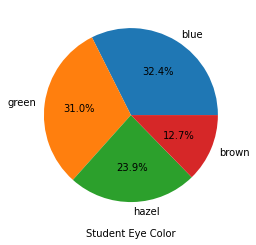

In [98]:
#Getting counts of different eye colors and representing them with 
#a pie chart
df['eye color'].value_counts().plot(kind='pie',autopct='%1.1f%%')

#Giving my pie chart a label on its x axis
plot.xlabel('Student Eye Color')

#using a space to remove the default label on the y axis, which is would have
#been the column name 'eye color'
plot.ylabel('')


Text(0, 0.5, '')

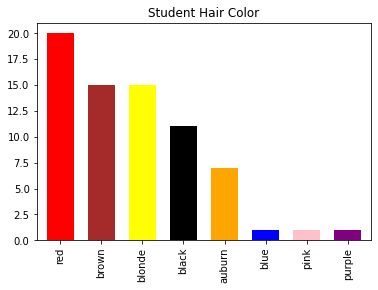

In [74]:
#Getting counts of hair color and representing each category in a
#bar chart, while also setting each bar equal to the color the 
#category represents
df['hair color'].value_counts().plot(kind='bar', width=0.65, color=
['red', 'brown', 'yellow', 'black', 'orange', 'blue', 'pink', 'purple'])

#Giving my pie chart a title
plot.title('Student Hair Color')

#using a space to remove the default label on the y axis, which is would have
#been the column name 'eye color'
plot.ylabel('')


### Database queries in Google Colab, using SQLite

We've tried creating some basic data visualizations using the Python libraries, but now we're also going to use SQLite to do some database queries, and then create data visualizations based on the results of those queries. Fun!

In [78]:
from google.colab import files
database = files.upload()

Saving sampledata.db to sampledata.db


In [82]:
#importing sqlite3 library
import sqlite3

#creating a variable called connection and setting it equal to the contents
#of my sampledata.db table
connection = sqlite3.connect("sampledata.db")

#creating a new variable called crsr that creates a cursor object which lets
#you traverse through the dataset
crsr = connection.cursor()

#execute the command to fetch all the data from the table sampledata
#where student age is 35
crsr.execute("SELECT COUNT(age) FROM sampledata WHERE age = 35")

#storing the result of the fetchall function in a variable called countAge
countAge = crsr.fetchall()
#prints countAge (the number of students in the database who are 35)
print(countAge)


[(5,)]


In [89]:
crsr2 = connection.cursor()

#Selecting disting height categories and sorting the heights in descening order
crsr2.execute("SELECT DISTINCT height FROM sampledata ORDER BY height DESC")

distinctHeight = crsr2.fetchall()
#prints countAge (the number of students in the database who are 35)
print(distinctHeight)


[('72',), ('71',), ('70',), ('68',), ('67',), ('66',), ('65',), ('64',), ('62',), ('61',), ('58',)]


Text(0.5, 0, 'Height in inches')

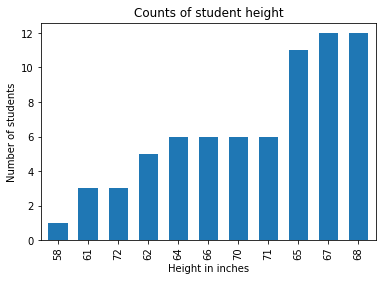

In [97]:
#Getting counts of height and representing each distinct category in a
#bar chart. I also put the bars in ascending height so we could easily
#see the largest height group in the dataset
df['height'].value_counts(ascending=True).plot(kind='bar', width=0.65)

#Giving my bar chart a title
plot.title('Counts of student height')

#I gave some x and y axis labels this time too
plot.ylabel('Number of students')
plot.xlabel('Height in inches')